In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from itertools import product
from itertools import combinations
import networkx as nx

In [2]:
'List of Steiner trees'
def steiner_trees(G,w):   
    n = len(G.nodes)
    for i in range(1,n):
        for T in combinations(G.edges,n-1):
            H = nx.Graph(T)
            stei= []
            if nx.is_tree(H):
                for x in w:
                    for y in w:
                        M = nx.Graph()
                        nx.add_path(M,nx.shortest_path(H,x,y))
                        stei = stei+ list(M.edges())    
                yield(stei)

In [3]:
def Fulkerson(G,w):
    

    for i, (u,v) in enumerate(G.edges()):
        G[u][v]['enum'] = i
    trees = list(steiner_trees(G,w))
    # count the number of edges
    m = len(G.edges)

    # initialize an empty list of rows for the augmented matrix
    rows = []

    # add rows corresponding to the constraints rho >= 0
    for i in range(m):
        row = (m+1)*[0]
        row[i+1] = 1
        rows.append(row)
    
    # add rows corresponding to the constraints N*rho >= 1
    for tree in trees:
        row = [-1] + m*[0]
        for u,v in tree:
            i = G[u][v]['enum']
            row[i+1] = 1
        rows.append(row)
    
    # create the polyhedron in cdd
    mat = cdd.Matrix(rows, number_type='fraction')
    mat.rep_type = cdd.RepType.INEQUALITY
    poly = cdd.Polyhedron(mat)
    ext = poly.get_generators()
    print(ext)
    return(ext)

In [4]:

def Drawdual(G,w):
    # list of dual objects
    dual = []
    ext = Fulkerson(G,w)
    # loop over extreme points and directions
    for i in range(ext.row_size):
    
        # skip extreme directions
        if ext[i][0] == 0:
            continue
        
        # add the vector representation of the dual object
        dual.append(ext[i][1:])
    
    # number of columns and rows for plot
    ncol = 4
    nrow = int(np.ceil(len(dual)/ncol))

    # draw the trees
    plt.figure(figsize=(3*ncol,3*nrow))
    pos = nx.spring_layout(G)
    # draw the blocker
    for i, obj in enumerate(dual):
        plt.subplot(nrow,ncol,i+1)
        labels = {(u,v):obj[d['enum']] for u,v,d in G.edges(data=True)}
        edges = [(u,v) for u,v,d in G.edges(data=True) if obj[d['enum']] > 0]
        nx.draw(G, pos, node_size=100, node_color='white', edge_color='blue')
        labelsnode = {u:u for u in G.nodes}
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=3)
        nx.draw_networkx_labels(G, pos,labels=labelsnode, font_size=12)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)
    plt.tight_layout()

V-representation
begin
 30 10 rational
 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0
 1 0 1/2 0 1/2 1/2 1/2 0 0 1/2
 1 0 1/2 0 1/2 1/2 1/2 0 1/2 0
 1 0 1 0 1 1 1 0 0 0
 1 0 1 0 1 1 0 0 1 0
 1 0 1 0 0 1 1 0 0 1
 1 1/2 1/2 0 1/2 1/2 0 1/2 1/2 0
 1 1/2 1/2 0 1/2 0 0 1/2 0 1/2
 1 1 1 0 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 0 0
 1 1/4 1/4 1/4 1/4 1/4 1/4 1/4 1/4 1/4
 1 1 1 1 0 0 0 0 0 1
 1 1/2 1/2 1/2 0 1/2 1/2 0 0 1/2
 1 1/2 1/2 1/2 0 0 0 1/2 0 1/2
 1 1/2 0 1/2 0 1/2 1/2 0 1/2 0
 1 1 0 1 0 1 1 0 0 0
 1 1 0 1 0 1 0 0 1 0
 1 1/2 0 1/2 0 1/2 0 1/2 1/2 0
 1 1 0 0 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0
end


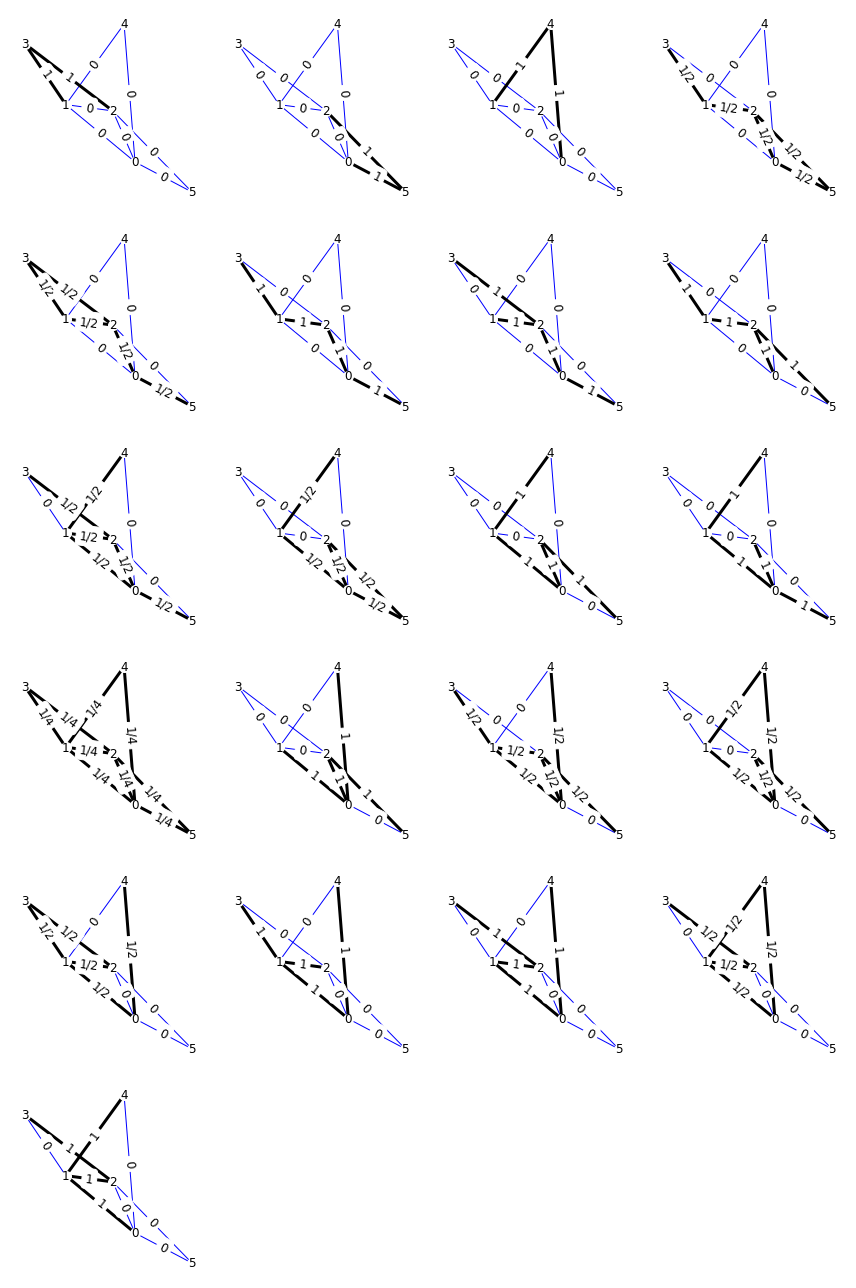

In [5]:
#G, pos = demo_graphs.slashed_house_graph()
G = nx.Graph()
#G = nx.random_geometric_graph(8, 0.5)
nx.add_path(G,[0,1,2,0])
nx.add_path(G,[1,3,2])
nx.add_path(G,[0,4,1])
nx.add_path(G,[0,5,2])
w = [3,4,5]
steiner_trees(G,w)
Drawdual(G,w)

V-representation
begin
 44 12 rational
 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 1 0 1
 1 0 0 1 1 0 0 1 0 1 1 0
 1 0 0 1/2 1/2 0 0 1/2 0 1/2 1/2 1/2
 1 0 0 1/2 0 0 1/2 1/2 1/2 0 1/2 1/2
 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 0 1 0 0 0 1 0 0 1 1
 1 0 1/2 1/2 0 1/2 1/2 1/2 0 1/2 1/2 1/2
 1 0 1/2 1/2 1/2 1/2 0 1/2 1/2 0 1/2 1/2
 1 0 1/2 0 1/2 1/2 1/2 0 0 1/2 1/2 1/2
 1 0 1/2 0 1/2 1/2 1/2 0 1/2 0 1/2 1/2
 1 0 1 0 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 0 0 1 0 0 1
 1 0 1 0 0 1 1 0 0 1 1 0
 1 0 1 1 0 1 1 1 0 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 0
 1 1 1 0 0 0 0 1 0 1 1 0
 1 1/2 1/2 0 1/2 1/2 0 1/2 1/2 0 1/2 1/2
 1 1/2 1/2 0 1/2 0 0 1/2 0 1/2 1/2 1/2
 1 1 1 0 1 0 0 1 0 0 1 1
 1 1 1 0 1 0 1 1 1 0 0 1
 1 1/2 1/2 0 1/2 0 1/2 1/2 1/2 0 1/2 1/2
 1 1/4 1/4 1/4 1/4 1/4 1/4 1/4 1/4 1/4 1/2 1/2
 1 1 1 1 0 0 0 0 0 1 0 1
 1 1/2 1/2 1/2 0 1/2 1/2 0 0 1/2 1/2 1/2
 1 1/2 1/2 1/2 0 0 0 1/2 0 1/2 1/2 1/2
 1 1 0 1 1 1 1 0 0 1 1 0
 1 1/2 0 1/2 0 1/2 1/2 0 1/2 0 1/2 1/2
 1 1 0 1 0 1 1 0 0 0 1 1
 1 1/2 0 1/2 0 1/2 0 1/2 1/2 0 1/2 1/2
 

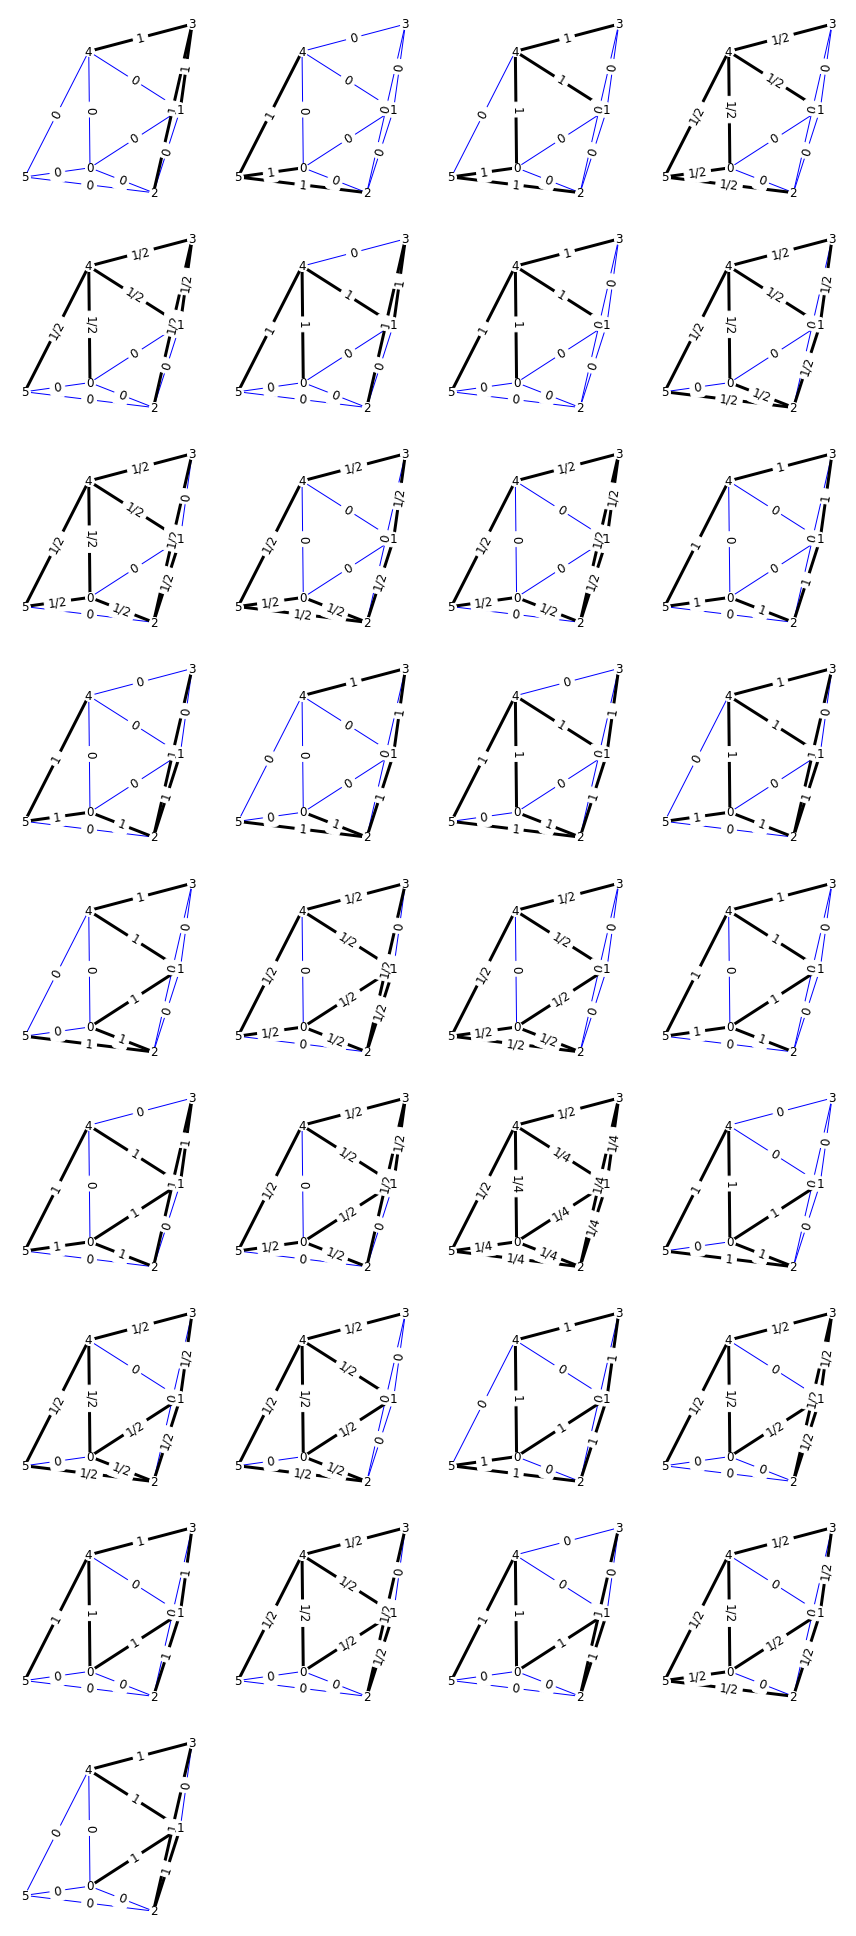

In [30]:
#G, pos = demo_graphs.slashed_house_graph()
G = nx.Graph()
#G = nx.random_geometric_graph(8, 0.5)
nx.add_path(G,[0,1,2,0])
nx.add_path(G,[1,3,2])
nx.add_path(G,[0,4,1])
nx.add_path(G,[0,5,2])
nx.add_path(G,[3,4,5])
w = [3,4,5]
steiner_trees(G,w)
Drawdual(G,w)



V-representation
begin
 46 11 rational
 1 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 1 1 1 1 0
 1 0 0 1/2 1/2 0 1/2 1/2 1/2 1/2 1/2
 1 0 0 1 0 0 1 0 1 0 1
 1 0 1 1 0 1 1 0 0 1 1
 1 0 1/2 1/2 0 1/2 1/2 0 1/2 1/2 1/2
 1 0 1/2 1/2 1/2 1/2 1/2 1/2 0 1/2 1/2
 1 0 1/2 1/2 1/2 1/2 1/2 1/2 1/2 1/2 0
 1 0 1/3 1/3 1/3 1/3 1/3 1/3 1/3 1/3 1/3
 1 0 1/2 1/2 1/2 1/2 1/2 1/2 1/2 0 1/2
 1 0 1/2 0 1/2 1/2 0 1/2 1/2 1/2 1/2
 1 0 1 0 1 1 0 1 1 0 1
 1 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 0 1 1 1 1 0
 1 1/2 1/2 0 0 1/2 1/2 1/2 1/2 1/2 0
 1 1/3 1/3 0 1/3 1/3 1/3 1/3 1/3 1/3 1/3
 1 1/2 1/2 0 1/2 1/2 1/2 1/2 1/2 0 1/2
 1 1/2 1/2 0 1/2 1/2 1/2 0 1/2 1/2 1/2
 1 1/2 1/2 0 1/2 0 1/2 1/2 1/2 1/2 1/2
 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 0 1 0 1 1
 1 1/2 1/2 1/2 0 1/2 0 1/2 1/2 1/2 1/2
 1 1/2 1/2 1/2 0 1/2 1/2 1/2 0 1/2 1/2
 1 1/3 1/3 1/3 0 1/3 1/3 1/3 1/3 1/3 1/3
 1 1/2 1/2 1/2 0 0 1/2 1/2 1/2 1/2 1/2
 1 1 0 1 1 1 0 0 1 1 0
 1 1/2 0 1/2 0 1/2 1/2 1/2 1/2 0 1/2
 1 1 0 1 0 1 0 1 1 0 1
 1 1/2 0 1/2 1/2 1/2 0 1/2

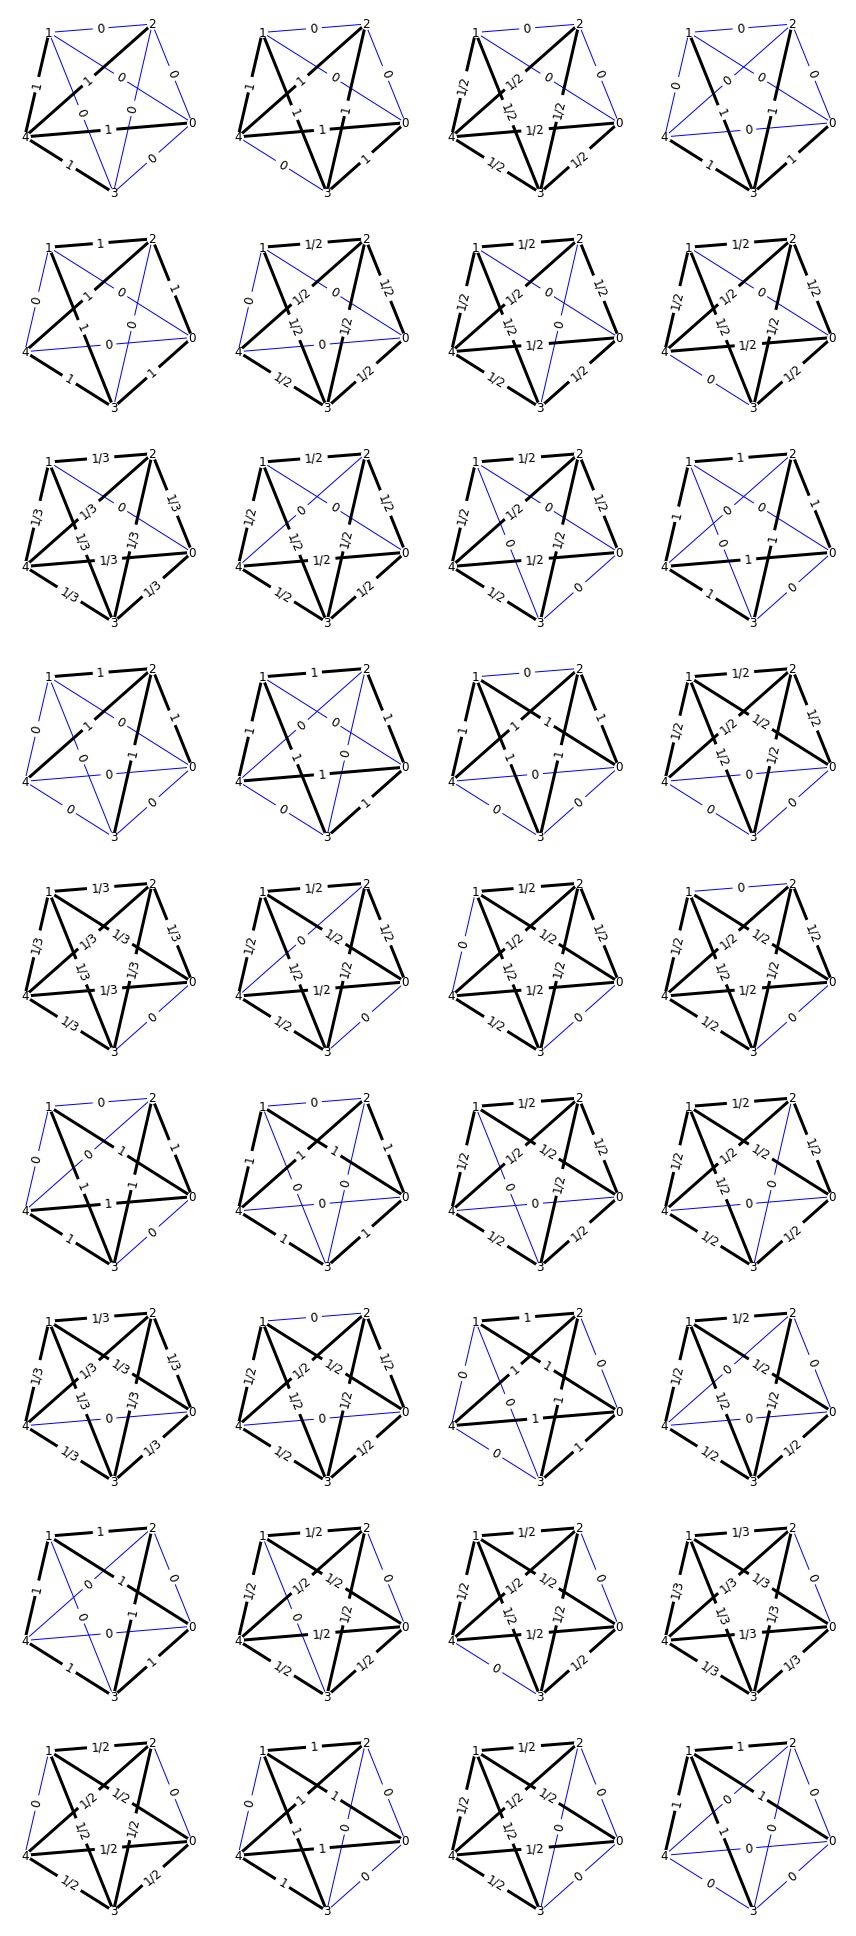

In [8]:
G = nx.complete_graph(5)
w = [3,4,2,1]
steiner_trees(G,w)
Drawdual(G,w)